<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import mysql.connector as connection
!pip install mysql-connector-python
warnings.filterwarnings("ignore")

<h1 style="color:purple" align="center">Data Import<h1>

In [3]:
try:
    mydb = connection.connect(host="localhost", database = 'e_master_card',user="root", passwd="1000",use_pure=True)
    query = "Select * from credit_profiles;"
    query2 = "Select * from customers;"
    query3 = "Select * from transactions;"
    credit_profiles = pd.read_sql(query,mydb)
    customers = pd.read_sql(query2,mydb)
    transactions = pd.read_sql(query3,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [3]:
customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


### Things i have noticed
We have a min age of 1, an annual income of 0 which is weird to me


In [4]:
customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [5]:
null_values = customers[customers.annual_income == 0]
null_values.shape

(50, 8)

Pandas did not detect null and na values are blanks but rather converted them to 0 in the customer.annual salary table

### Dealing with null values
Since we havent checked for outliers yet, it wont be wise to use the mean as a method of imputation the null values. Hence i will go with the median for the time being.
But since we are looking at the annual salary for different occupation, we can not just use the median of the total income but rather we group each occupation and find the median of each occupation.

In [6]:
customers.annual_income.median()

107275.0

In [7]:
customers.occupation

0           Business Owner
1               Consultant
2               Freelancer
3               Freelancer
4               Consultant
              ...         
995             Freelancer
996         Business Owner
997    Fullstack Developer
998         Business Owner
999             Freelancer
Name: occupation, Length: 1000, dtype: object

In [8]:
null_values

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married
232,233,Aditya Goel,Male,26,City,Freelancer,0,Married


In [9]:
occupation_median = customers.groupby('occupation')['annual_income'].median()
occupation_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [10]:
# 2. Replace null values in annual_income with the median income of their occupation group
customers['annual_income'] = customers.apply(
    lambda row: occupation_median[row['occupation']] if row['annual_income'] == 0 else row['annual_income'],
    axis=1
)


### Distribution

We will notice that the income distribution is right skewed 

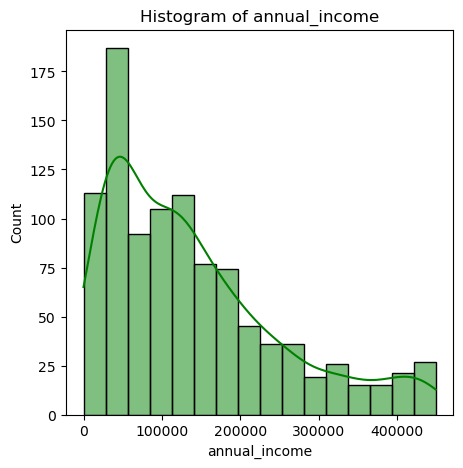

In [11]:
plt.figure(figsize=(5, 5))
sns.histplot(customers['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [12]:
customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138634.437500
std,288.819436,15.666155,110961.396638
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [13]:
customers[customers.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [14]:
for index, row in customers.iterrows():
    if row["annual_income"] < 100:
        occupation = customers.at[index, "occupation"]
        customers.at[index, "annual_income"] = occupation_median[occupation]

In [15]:
customers.groupby('occupation')['annual_income'].mean()

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [16]:
customers.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [17]:
customers[(customers.age >=15) & (customers.age <=80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
5,6,Arya Das,Male,22,City,Freelancer,44887.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,45189.5,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,254881.0,Married


In [18]:
customers_age = customers.groupby('occupation')['age'].median()
customers_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [19]:
type(customers_age)

pandas.core.series.Series

In [20]:
for key,value in customers.iterrows():
    if value['age'] < 15 or value['age'] > 80:
        customers.at[key, 'age'] = customers_age[value['occupation']]


In [21]:
customers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,45189.5,Married
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47.0,City,Business Owner,254881.0,Married


In [22]:
customers_location = customers.location.value_counts()
customers_location

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [23]:
type(customers_location)

pandas.core.series.Series

<Axes: ylabel='count'>

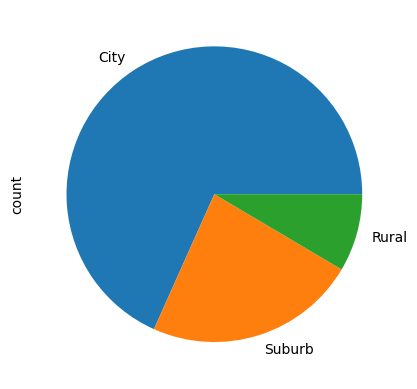

In [24]:
customers_location.plot.pie()

In [25]:
customers_loc = customers.groupby('location').location.value_counts()
customers_loc

location
City      683
Rural      85
Suburb    232
Name: count, dtype: int64

<Axes: xlabel='location'>

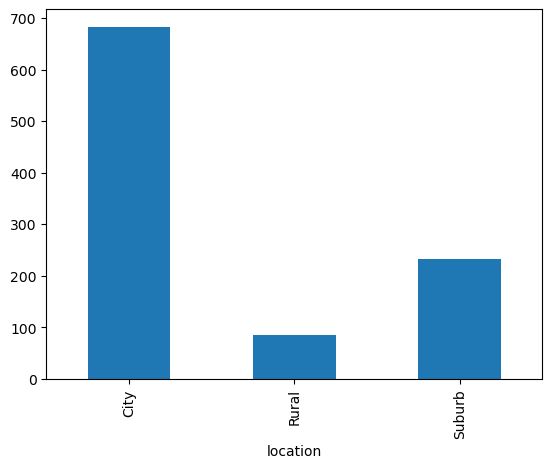

In [26]:
customers_loc.plot.bar(stacked=True)

In [27]:
bins_number = [17,25,48,65]
lab = ['18-25', '36-48', '49-65']

# Step 3: Use cut() to categorize the marks
customers['Age_category'] = pd.cut(customers['age'], bins=bins_number, labels=lab, include_lowest=True)

In [28]:
age_bins = customers.Age_category.value_counts()
age_bins

Age_category
36-48    567
18-25    246
49-65    187
Name: count, dtype: int64

In [29]:
age_bins.index

CategoricalIndex(['36-48', '18-25', '49-65'], categories=['18-25', '36-48', '49-65'], ordered=True, dtype='category', name='Age_category')

<Axes: ylabel='count'>

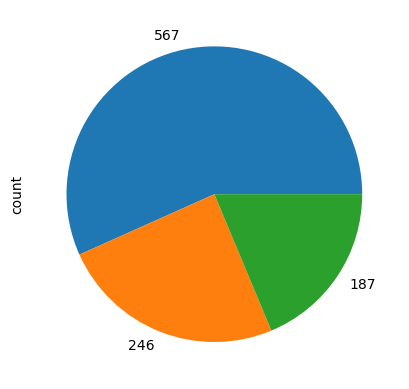

In [30]:
age_bins.plot.pie(labels=age_bins.values)

In [31]:
customers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,Age_category
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,36-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,36-48
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,45189.5,Married,36-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,36-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,254881.0,Married,36-48


In [37]:
location_gender = customers.groupby(['location','gender']).size().unstack()
location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


<Axes: xlabel='location'>

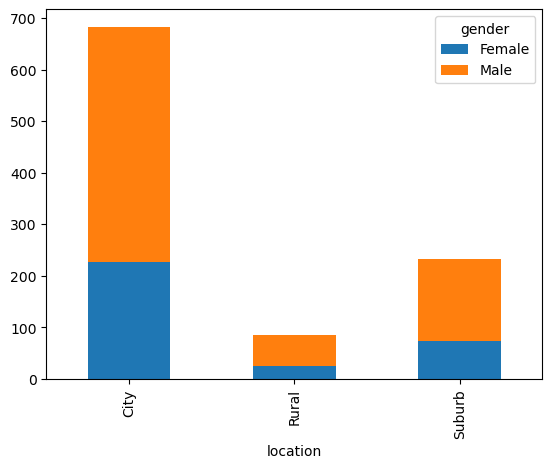

In [45]:
location_gender.plot(kind='bar', stacked=True)

In [46]:
credit_profiles

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [47]:
credit_profiles.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [53]:
credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['outstanding_debt'] = credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['credit_limit']

In [54]:
credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
1,2,587,0.107928,161644.0,2.0,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0
204,205,303,0.364360,187849.0,0.0,500.0
271,272,703,0.446886,154568.0,1.0,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0
350,351,320,0.285081,150860.0,0.0,500.0
446,447,754,0.178394,206191.0,2.0,60000.0


In [64]:
good =credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['credit_limit']
good

1       1250.0
19      1500.0
25     60000.0
38     40000.0
93     40000.0
204      500.0
271    40000.0
330    60000.0
350      500.0
446    60000.0
545    60000.0
639      500.0
649      750.0
702    60000.0
727      750.0
734     1500.0
770      750.0
866    60000.0
Name: credit_limit, dtype: float64

In [63]:
credit_profiles_outliers = credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['outstanding_debt']
credit_profiles_outliers

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
330    208898.0
350    150860.0
446    206191.0
545    135112.0
639    140063.0
649    128818.0
702    190717.0
727    140008.0
734    209901.0
770    195004.0
866    208406.0
Name: outstanding_debt, dtype: float64

In [71]:
credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
330    208898.0
350    150860.0
446    206191.0
545    135112.0
639    140063.0
649    128818.0
702    190717.0
727    140008.0
734    209901.0
770    195004.0
866    208406.0
Name: outstanding_debt, dtype: float64

In [76]:
credit_profiles['outstanding_debt'] > credit_profiles['credit_limit'] = good

SyntaxError: cannot assign to comparison (3678053149.py, line 1)

In [77]:
credit_profiles.loc[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit'],'outstanding_debt'] = good

In [78]:
credit_profiles[credit_profiles['outstanding_debt'] > credit_profiles['credit_limit']]['outstanding_debt']

Series([], Name: outstanding_debt, dtype: float64)

In [5]:
customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [11]:
annual_income = customers.groupby('occupation')['annual_income'].median()
annual_income

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [ ]:
def annual_income_fun(item):
    if item['annual_income'] == 0:
        item['annual_income'] = annual_income[item['occupation']]

In [23]:
customers[customers.annual_income == 0]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married
232,233,Aditya Goel,Male,26,City,Freelancer,0,Married
